In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  1.Getting the data ready

In [2]:
heart_disease = pd.read_csv('11.3 heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#create x (features matrix)
x = heart_disease.drop('target', axis=1)

#create y (labels)
y = heart_disease['target']

## 2. choose the right model and hyperparameters

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. fit the model to the training data

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [8]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2


In [9]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [10]:
y_test

38     1
58     1
203    0
219    0
66     1
      ..
220    0
208    0
30     1
261    0
152    1
Name: target, Length: 61, dtype: int64

In [11]:
y_train

107    1
167    0
199    0
61     1
127    1
      ..
138    1
136    1
40     1
108    1
211    0
Name: target, Length: 242, dtype: int64

In [12]:
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

## 4. evaluate the model on training and test data

In [13]:
clf.score(x_train, y_train)

1.0

In [14]:
clf.score(x_test, y_test)

0.8032786885245902

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds, digits=4))

              precision    recall  f1-score   support

           0     0.7143    0.8333    0.7692        24
           1     0.8788    0.7838    0.8286        37

    accuracy                         0.8033        61
   macro avg     0.7965    0.8086    0.7989        61
weighted avg     0.8141    0.8033    0.8052        61



In [16]:
print(confusion_matrix(y_test, y_preds))

[[20  4]
 [ 8 29]]


In [17]:
print(accuracy_score(y_test, y_preds))

0.8032786885245902


## 5. improve a model

In [18]:
#trying diff amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 73.77%

Trying model with 20 estimators...
Model accuracy on test set: 83.61%

Trying model with 30 estimators...
Model accuracy on test set: 80.33%

Trying model with 40 estimators...
Model accuracy on test set: 78.69%

Trying model with 50 estimators...
Model accuracy on test set: 77.05%

Trying model with 60 estimators...
Model accuracy on test set: 77.05%

Trying model with 70 estimators...
Model accuracy on test set: 73.77%

Trying model with 80 estimators...
Model accuracy on test set: 78.69%

Trying model with 90 estimators...
Model accuracy on test set: 83.61%



## 6. save the model

In [19]:
import pickle

pickle.dump(clf, open('random_forest_class_model_1.pkl', 'wb'))

In [20]:
# then load the model for future use
loaded_model = pickle.load(open('random_forest_class_model_1.pkl', "rb"))
loaded_model.score(x_test, y_test)

0.8360655737704918

## new part
 1.1 makiing sure the data is numerical

In [21]:
#car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv")
#car_sales

In [22]:
#car_sales.to_csv('car_sales_extended.csv', index=False)

In [23]:
car_sales = pd.read_csv('car_sales_extended.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [25]:
#split into x/y
x = car_sales.drop('Price', axis=1) #which is our target variable
y = car_sales['Price']

#splitting into training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
#building a machine learning model
from sklearn.ensemble import RandomForestRegressor #using regressor bcos it can predict a number(price)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [27]:
# to avoid the errors above, we need to turn the categorical features to numbers using onehotencoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [28]:
#putting it into a dataframe
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [29]:
# we could also use another method in transforming the categorical data to numerical numbers
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [30]:
#refitting the model
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3235867221569877

## Working with missing data
1. fill them with some value (also known as imputation)
2. remove the samples with missing data altogether

In [31]:
#car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
#car_sales_missing

In [32]:
#car_sales_missing.to_csv('car-sales-extended-missing-data.csv', index=False)

In [33]:
car_sales_missing_d = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing_d.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [34]:
car_sales_missing_d.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [35]:
#create x and y
x = car_sales_missing_d.drop('Price', axis=1)
y = car_sales_missing_d['Price']

In [36]:
# turn the categorical features to numbers using onehotencoder
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

#categorical_features = ['Make', 'Colour', 'Doors']
#one_hot = OneHotEncoder()
#transformer = ColumnTransformer([('one_hot',
 #                                  one_hot,
  #                                 categorical_features)],
   #                                remainder='passthrough')

#transformed_x = transformer.fit_transform(x)
#transformed_x

In [37]:
#fill the missing data with pandas
car_sales_missing_d['Make'].fillna('missing', inplace=True)

car_sales_missing_d['Colour'].fillna('missing', inplace=True)

car_sales_missing_d['Odometer (KM)'].fillna(car_sales_missing_d['Odometer (KM)'].mean(), inplace=True)

car_sales_missing_d['Doors'].fillna(4, inplace=True)#filling it with 4 because 4 has the highest value counts in the dataset

In [38]:
car_sales_missing_d.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [39]:
car_sales_missing_d.dropna(inplace=True)

In [40]:
car_sales_missing_d.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [41]:
len(car_sales_missing_d)

950

In [42]:
# recreate x and y
x = car_sales_missing_d.drop('Price', axis=1)
y = car_sales_missing_d['Price']

In [43]:
# turn the categorical features to numbers using onehotencoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_x = transformer.fit_transform(car_sales_missing_d)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [44]:
# fitting the model
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9998421058539825

In [45]:
# filling the mixing data with sklearn method
# reimporting the dataset
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
#drop the rows with missing value in `price` column
car_sales_missing.dropna(subset=['Price'], inplace=True)

In [48]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
# split into x and y
x= car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

NOTE: we split the dataset into test and train set to fill the missing values seperately

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill the categorical values with `missing` and the numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

In [51]:
#define different column features
categorical_features = ['Make', 'Colour']
door_feature = ['Doors']
numerical_feature = ['Odometer (KM)']

NOTE: we use fit_transform() on the training data and transform() on the testing data.
      In essence we learn the patterns in the training set and transform it via imputation(fit then transform).
      Then we take those same patterns and fill the test set(transform only)

In [52]:
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, categorical_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, numerical_feature)])

#fill train and test values seperately
filled_x_train = imputer.fit_transform(x_train)
filled_x_test = imputer.transform(x_test)

#check filled x_train
filled_x_train

array([['Nissan', 'White', 4.0, 64362.0],
       ['Nissan', 'missing', 4.0, 206073.0],
       ['Toyota', 'Blue', 4.0, 156478.0],
       ...,
       ['Honda', 'Blue', 4.0, 230570.0],
       ['Toyota', 'Red', 4.0, 193006.0],
       ['Nissan', 'Red', 4.0, 61892.0]], dtype=object)

In [53]:
# putting the transformed data arrays into a dataframe
car_sales_filled_train = pd.DataFrame(filled_x_train, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

car_sales_filled_test = pd.DataFrame(filled_x_test, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

#check for missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [54]:
# turn the categorical features to numbers using onehotencoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

#fill train and test values seperately 
transformed_x_train = transformer.fit_transform(car_sales_filled_train)
transformed_x_test = transformer.transform(car_sales_filled_test)

In [55]:
transformed_x_train.toarray()

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.43620e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.06073e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.56478e+05],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.30570e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.93006e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.18920e+04]])

In [56]:
#now lets fit the model

from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor()
model.fit(transformed_x_train, y_train)
model.score(transformed_x_test, y_test)

0.31444379537998246

## Working on a regression problem using a machine learning model

In [57]:
# load the boston dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [58]:
# putting it into a dataframe
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
len(boston_df)

506

In [60]:
# using the ridge regression model
from sklearn.linear_model import Ridge

np.random.seed(42)

x = boston_df.drop('target', axis=1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#instantiate ridge model
model = Ridge()
model.fit(x_train, y_train)

# check the score of the ridge model on the test set
model.score(x_test, y_test)

0.6662221670168522

the Ridge regression model worked well, buh we can improve the score by trying another model

In [61]:
# using the reandomforest regressor

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target', axis=1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#instantiate randomforestregressor model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# check the score of the ridge model on the test set
rf.score(x_test, y_test)

0.8654448653350507

the random forest regressor performed better than the Ridge regressor on the dataset

## working on a classification problem

In [62]:
heart_disease = pd.read_csv('11.3 heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
len(heart_disease)

303

In [64]:
# using the randomforest classifier

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#instantiate randomforestclassifier model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# check the score of the rfc model on the test set
clf.score(x_test, y_test)

0.8524590163934426

### Using the model to make predictions
there are 2 ways of doing this
1. `predict()`
2. `predict_proba()`

In [65]:
# 1. using predict

clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [66]:
np.array(y_test)# same format, which is lovely

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [67]:
#comparing predictions to truth labels(which is y) to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [68]:
clf.score(x_test, y_test)

0.8524590163934426

In [69]:
# one more way of doing it
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

the model predicted successfully!

In [70]:
# 2. using predict_proba()
# predict proba() returns probabilities of a classification model

clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [71]:
# predict() on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

From the predictions above, '0' means no heart disease...while '1' means heart disease

### predicting on a regression model

In [72]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target', axis = 1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8654448653350507

In [74]:
y_preds = model.predict(x_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [75]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [76]:
#compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_preds)
MAE

2.136382352941176

## Evaluating a machine learning model
3 methods
1. `score` method
2. the `scoring` parameter
3. problem-specific metric functions

In [77]:
# 1. the score method
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rfc = RandomForestClassifier().fit(x_train, y_train)
rfc.score(x_test, y_test)

0.8524590163934426

In [79]:
# 2. the `scoring` parameter
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rfc = RandomForestClassifier().fit(x_train, y_train)

In [80]:
rfc.score(x_test, y_test)

0.8524590163934426

In [81]:
cross_val_score(rfc, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [82]:
cross_val_score(rfc, x, y, cv=10)# we can decide to increase the cross validation value

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [83]:
cross_val_score(rfc, x, y, scoring=None)#the scoring is none by default, which uses the scoring of the model(in this case, the score uses mean accuracy)

array([0.85245902, 0.8852459 , 0.81967213, 0.8       , 0.78333333])

### 2.1 classification model evaluation metrics
1. accuracy
2. area under ROC curve
3. confusion matrix
4. classification report

In [84]:
#2.1.1 Accuracy
cross_val_score = cross_val_score(rfc, x, y)
np.mean(cross_val_score)

0.8184153005464481

In [85]:
print(f" heart disease classifier cross validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

 heart disease classifier cross validated Accuracy: 81.84%


### 2.1.2 Area under the receiver operation characteristics curve (AUC/ROC)
ROC curves is a comparison of a model's true positive rate tpr to its false positive rate fpr
* true positive = model predicts 1 when truth is 1
* true negative = model predicts 1 when truth is 0
* false positive = model predicts 0 when truth is 0
* false negative = model predicts 0 when truth is 1

In [86]:
from sklearn.metrics import roc_curve

#make predictions with probabilities
y_probs = rfc.predict_proba(x_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [87]:
y_probs_positive = y_probs[:, 1]# slicing to return only column 1 of every row
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [88]:
#calculate fpr tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

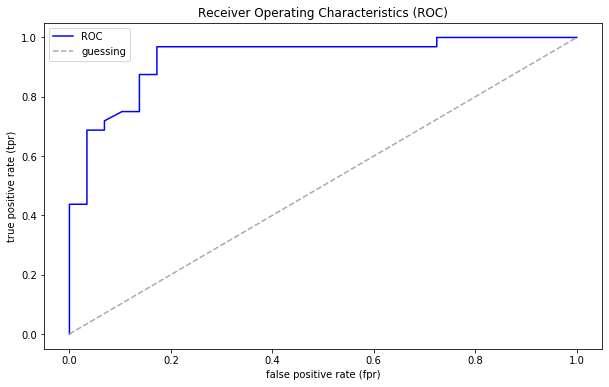

In [89]:
# create a function for plotting roc curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    plots a ROC curve given the fpr and tpr of a model
    """
    #plot Roc curve
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='blue', label='ROC')
    #plot a line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkgrey',linestyle='--', label='guessing')
    
    #customize the plot
    plt.xlabel('false positive rate (fpr)')
    plt.ylabel('true positive rate (tpr)')
    plt.title('Receiver Operating Characteristics (ROC)')
    plt.legend()
    plt.show
    
plot_roc_curve(fpr, tpr)

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

### 2.1.3 confusion matrix

In [91]:
from sklearn.metrics import confusion_matrix

y_preds = rfc.predict(x_test)
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [92]:
#visualize with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=['actual labels'],
            colnames=['predicted labels'])


predicted labels,0,1
actual labels,,
0,24,5
1,4,28


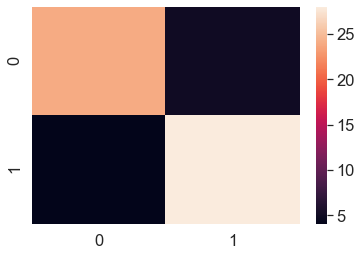

In [93]:
# visualizing using seaborn's heatmap
import seaborn as sns

#set the font size
sns.set(font_scale=1.5)
#create confusion matrix
conf_mat
#plot using seaborn
sns.heatmap(conf_mat);

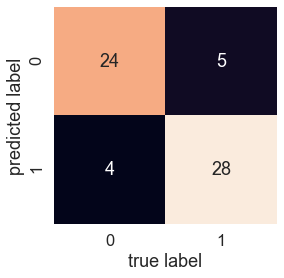

In [94]:
def plot_conf_mat(conf_mat):
    """
    plots a confusion matrix using seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(conf_mat,
                     annot=True,
                     cbar=False)
    
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    
plot_conf_mat(conf_mat)

### 2.1.4 classification report

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [96]:
#into a dataframe to look more organized
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.857143,0.848485,0.852459,0.852814,0.852601
recall,0.827586,0.875000,0.852459,0.851293,0.852459
f1-score,0.842105,0.861538,0.852459,0.851822,0.852300
support,29.000000,32.000000,0.852459,61.000000,61.000000


### Regression model evaluation metrics
1. R^2 R squared
2. MAE mean absolute error
3. MSE mean squared error

In [97]:
# R^2 method
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target', axis=1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train);

In [98]:
model.score(x_test, y_test)

0.8654448653350507

In [99]:
from sklearn.metrics import r2_score

#fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [100]:
y_test.mean()

21.488235294117654

In [101]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [102]:
r2_score(y_test, y_test)

1.0

In [103]:
# MEAN ABSOLUTE ERROR (MAE)
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
MAE = mean_absolute_error(y_test, y_preds)
MAE

2.136382352941176

In [104]:
df = pd.DataFrame(data = {'actual values': y_test,
                      'predicted values': y_preds})
df['differences'] = df['actual values'] - df['predicted values']
df

,actual values,predicted values,differences
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,-3.159
72,22.8,23.460,-0.660
452,16.1,16.893,-0.793
...,...,...,...
412,17.9,13.159,4.741
436,9.6,12.476,-2.876
411,17.2,13.612,3.588
86,22.5,20.205,2.295


In [105]:
# MSE 
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
MSE = mean_squared_error(y_test, y_preds)
MSE 

9.867437068627442

### the `scoring` parameter

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']
clf = RandomForestClassifier()

In [107]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [108]:
np.mean(cv_acc)

0.8248087431693989

In [109]:
#accuracy
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [110]:
np.mean(cv_acc)

0.8248087431693989

In [111]:
#precision
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [112]:
np.mean(cv_precision)

0.8329547346025924

In [113]:
#f1
np.random.seed(42)
cv_f1 = cross_val_score(clf, x, y, scoring='f1')
cv_f1

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [114]:
np.mean(cv_f1)

0.8426854603423346

In [115]:
#recall
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [116]:
np.mean(cv_recall)

0.8545454545454545

`scoring` parameters on Regression model

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x = boston_df.drop('target', axis=1)
y = boston_df['target']

model = RandomForestRegressor()

In [118]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [119]:
np.mean(cv_r2)

0.6243870737930857

In [120]:
#R^2
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, scoring='r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [121]:
np.mean(cv_r2)

0.6243870737930857

In [122]:
#MAE
np.random.seed(42)
cv_mae = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [123]:
np.mean(cv_mae)

-3.0312352552902335

In [124]:
# MSE
np.random.seed(42)
cv_mse = cross_val_score(model, x, y, scoring='neg_mean_squared_error')
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

In [125]:
np.mean(cv_mse)

-21.261442856882137

## 3. using different evaluation metrics as scikit learn function
**classification evaluation function**

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_preds = clf.predict(x_test)

# evaluate the classifier
print('classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds) *100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')

classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation function**

In [127]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
x = boston_df.drop('target', axis=1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

# evaluate the classifier
print('Regressor metrics on the test set')
print(f'R^2: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regressor metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## IMPROVING A MODEL
**TUNING HYPERPARAMETERS**
1. by hand
2. by randomizedSearchCV
3. by GridSearchCV

In [128]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [129]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [130]:
#defining a function
def evaluate_preds(y_true, y_preds):
    """
    performs evaluation comparison on y_true labels vs y_preds labels on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy,2),
                   'precision': round(precision, 2),
                   'recall': round(recall, 2),
                   'f1': round(f1, 2)}
    print(f'acc: {accuracy * 100:.2f}%')
    print(f'precision: {precision:.2f}')
    print(f'recall: {recall:.2f}')
    print(f'f1 score: {f1:.2f}')
    
    return metric_dict

**RANDOMIZEDSEARCHCV**

In [134]:
# USING RANDOMIZEDSEARCHCV
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [1, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

np.random.seed(42)
#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)
#setup Randomsearchcv
RS_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, #number of models to try
                           cv=5,
                           verbose=2)

RS_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=6, min_samples_lea

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   3.7s
[CV] n_estimators=1200, min_samples_split=6, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [1, 100, 200, 500, 1000,
                                                         1200]},
                   verbose=2)

In [135]:
RS_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}

In [136]:
# make predictions with the best parameters
RS_y_preds = RS_clf.predict(x_test)

# evaluate the predictions
RS_metrics = evaluate_preds(y_test, RS_y_preds)

acc: 83.61%
precision: 0.87
recall: 0.82
f1 score: 0.84


**GRIDSEARCHCV**

In [137]:
grid

{'n_estimators': [1, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [139]:
# using a new grid by comparing the best params from RSCV
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None, 5, 10, 20],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [4]}

In [140]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

#setup GridSearchCV
GS_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

GS_clf.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4], 'min_samples_split': [2],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [141]:
GS_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [142]:
# make predictions with the best parameters
GS_y_preds = GS_clf.predict(x_test)

# evaluate the predictions
GS_metrics = evaluate_preds(y_test, GS_y_preds)

acc: 81.97%
precision: 0.76
recall: 0.89
f1 score: 0.82


**Comparing the different models**

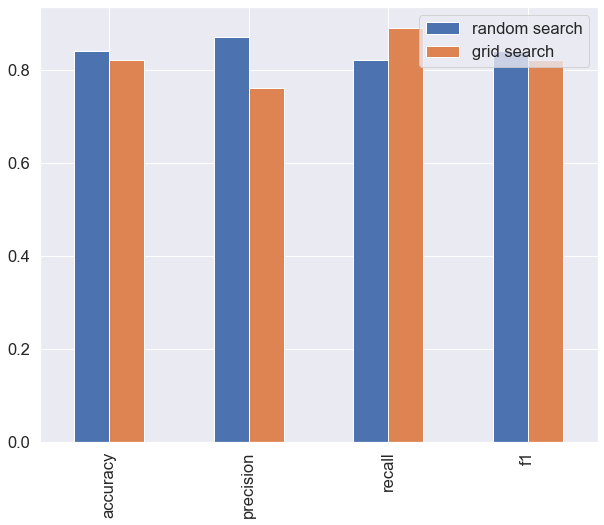

In [144]:
compare_metrics = pd.DataFrame({'random search': RS_metrics,
                                'grid search': GS_metrics})

compare_metrics.plot.bar(figsize=(10,8));

### SAVING THE MODEL

In [148]:
#using pickle

import pickle
pickle.dump(RS_clf, open('RS_random_forest_model_1.pkl', 'wb'))

In [149]:
# load a saved model
#loaded_pickle_model = pickle.load(open('RS_random_forest_model_1.pkl', 'rb'))

In [150]:
# making predictions
#pickle_y_preds = loaded_pickle_model.predict(x_test)
#evaluate_preds(y_test, pickle_y_preds)

In [152]:
#using JOBLIB (its more preferable for big datasets)
from joblib import dump, load

dump(RS_clf, filename='RS_random_forest_model_1.joblib')

['RS_random_forest_model_1.joblib']

In [153]:
#loaded_joblib_model = load(filename='RS_random_forest_model_1.joblib')

In [154]:
# making predictions
#joblib_y_preds = loaded_joblib_model.predict(x_test)
#evaluate_preds(y_test, joblib_y_preds)

## PUTTING IT ALL TOGETHER
**Using a pipeline**

In [162]:
# using the car sales dataset
data = pd.read_csv('car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [163]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [164]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps to cover
1. fill missing data
2. convert data to numbers
3. build a model on the data

In [168]:
#getting the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#set up random seed
import numpy as np
np.random.seed(42)

#import data and drop rows with missing labels
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)

# define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

#set up preprocessing steps (fill missing values , then convert to numbers)
preprocessor = ColumnTransformer(
                       transformers=[
                           ('cat', categorical_transformer, categorical_features),
                           ('door', door_transformer, door_feature),
                           ('num', numeric_transformer, numeric_features)])

# creating a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestRegressor())])

#split data
x = data.drop('Price', axis=1)
y = data['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

In [171]:
# Use GridSearchCV with our regression pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split': [2, 4]}

Gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
Gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   3.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   3.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   3.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.9min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [172]:
Gs_model.score(x_test, y_test)

0.3339554263158365